In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import os
import sys

import numpy as np
from numba import jit

import astropy.units as u
from astropy import wcs
from astropy.io import fits
from astropy.coordinates import SkyCoord
from astropy.visualization import make_lupton_rgb
from astropy.utils.data import download_file, clear_download_cache

import matplotlib.pyplot as plt
from matplotlib import rcParams

print(np.__version__)

1.19.5


### Prepare the data

In [2]:
from kungpao import isophote

from kungpao.display import display_single

In [3]:
test_fits = '../../huoguo/data/M51.fits'

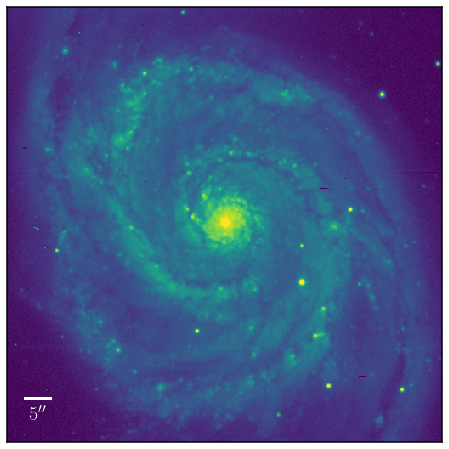

In [4]:
test_img = fits.open(test_fits)[0].data

_ = display_single(test_img)

In [10]:
from kungpao.isophote import helper
from kungpao.isophote import config

#### Location of the binary IRAF files

In [11]:
helper.iraf_commands()

('/Users/song/Dropbox/work/project/kungpao/kungpao/iraf/macosx/x_isophote.e',
 '/Users/song/Dropbox/work/project/kungpao/kungpao/iraf/macosx/x_ttools.e',
 '/Users/song/Dropbox/work/project/kungpao/kungpao/iraf/macosx/x_images.e')

#### Load the configuration file

In [30]:
config_default = config.EllipseConfig()

In [31]:
config_default.config

{'control': {'conver': 0.05,
  'minit': 10,
  'maxit': 50,
  'hcenter': False,
  'hellip': False,
  'hpa': False,
  'wander': 'None',
  'maxgerr': 0.5,
  'olthresh': 1.0,
  'soft': False},
 'sample': {'integrmode': 'bi-linear',
  'usclip': 3.0,
  'lsclip': 3.0,
  'nclip': 1,
  'fflag': 0.5,
  'harmonics': 'None',
  'absangle': True},
 'geom': {'x0': 'None',
  'y0': 'None',
  'ellip0': 0.1,
  'pa0': 20.0,
  'sma0': 10.0,
  'minsma': 0.0,
  'maxsma': 'None',
  'step': 0.1,
  'linear': False,
  'maxrit': 100,
  'recenter': True,
  'xylearn': True},
 'mag': {'mag0': 0.0, 'refer': 1.0, 'zerolevel': 0.0}}

In [24]:
config_default.config['sample']['nclip'] = 2

In [36]:
config_default.control['conver'] = 0.01

In [37]:
config_default.control

{'conver': 0.01,
 'minit': 10,
 'maxit': 50,
 'hcenter': False,
 'hellip': False,
 'hpa': False,
 'wander': 'None',
 'maxgerr': 0.5,
 'olthresh': 1.0,
 'soft': False}

In [38]:
config_default.config

{'control': {'conver': 0.05,
  'minit': 10,
  'maxit': 50,
  'hcenter': False,
  'hellip': False,
  'hpa': False,
  'wander': 'None',
  'maxgerr': 0.5,
  'olthresh': 1.0,
  'soft': False},
 'sample': {'integrmode': 'bi-linear',
  'usclip': 3.0,
  'lsclip': 3.0,
  'nclip': 1,
  'fflag': 0.5,
  'harmonics': 'None',
  'absangle': True},
 'geom': {'x0': 'None',
  'y0': 'None',
  'ellip0': 0.1,
  'pa0': 20.0,
  'sma0': 10.0,
  'minsma': 0.0,
  'maxsma': 'None',
  'step': 0.1,
  'linear': False,
  'maxrit': 100,
  'recenter': True,
  'xylearn': True},
 'mag': {'mag0': 0.0, 'refer': 1.0, 'zerolevel': 0.0}}